## GLCM Example 2
### CS4243, Amir, 2022

In [3]:
import math as m
import cv2
import numpy as np
import random as rnd
from matplotlib import pyplot as plt

In [4]:
# parameters, number of graylevels, distance and theta (GL,d,t)
GL= 32
d=1
t=0

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
gdrive	sample_data


In [6]:
img = cv2.imread('/content/gdrive/MyDrive/ANN/IMG_0054q.jpg',0)

In [7]:
print(type(img) )

<class 'numpy.ndarray'>


In [8]:
# the main GLCM function. it uses the definitions mentioned in the course slides and CW3 
# output is the glcm matrix, ccmm

def am_glcm( img , GL , d , t):
    M = img.shape
    ccmm = np.zeros([GL,GL])
    for i in range(GL):
        for j in range(GL):
            idx1 = (img==i)
            idx2 = (img==j)
            for m in range(M[0]):
                for n in range(M[1]):
                    m2,n2 = distnc(m,n,d,t)
                    if (0<= m2< M[0]) and (0<= n2< M[1]): 
                        if idx1[m,n] and idx2[m2,n2]:
                            ccmm[i,j] += 1
        print(i)
        
    return ccmm
                        

In [9]:
# a function to find the position of a pixel which is in distance d and direction t of our current pixel <i,j>
# inputs are the position of our current pixel <i,j>, and the desired distance, d, and direction theta, t 
# output is the position of a target pixel <m,n> which is in distance d and direction t of <i,j>
# boundary check would be done in the main function
# t only can be 0,45,90,135
#
def distnc(i,j,d,t): 
    if t==0:
        m = i
        n = j+d
    elif t==45:
        m = i+d
        n = j+d
    elif t==90:
        m = i+d
        n = j
    elif t==135:
        m = i-d
        n = j-d
    else:
        m = -1
        n = -1
    
    return m,n
    

In [10]:
# function to extract 3 features from the glcm matrix. 
# input is the glcm matrix 
# output is maximum, energy, and inertia
# definitions in the course slides
#
def glcm_feat( g11 ):
    mxx = np.max(g11)
    enrg = np.sum(np.multiply(g11,g11))
    inrt = 0
    M = g11.shape
    for i in range(M[0]):
        for j in range(M[1]):
            inrt = inrt + (i-j)**2 * g11[i,j]
    
    return mxx , enrg , inrt

In [ ]:
# testing the GLCM program 

dddd = am_glcm( img , GL , d , t)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [ ]:
np.sum(dddd)


94862.0

In [ ]:
dddd

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ..., 714., 576., 411.],
       [  0.,   0.,   0., ..., 635., 737., 537.],
       [  0.,   0.,   0., ..., 491., 624., 611.]])

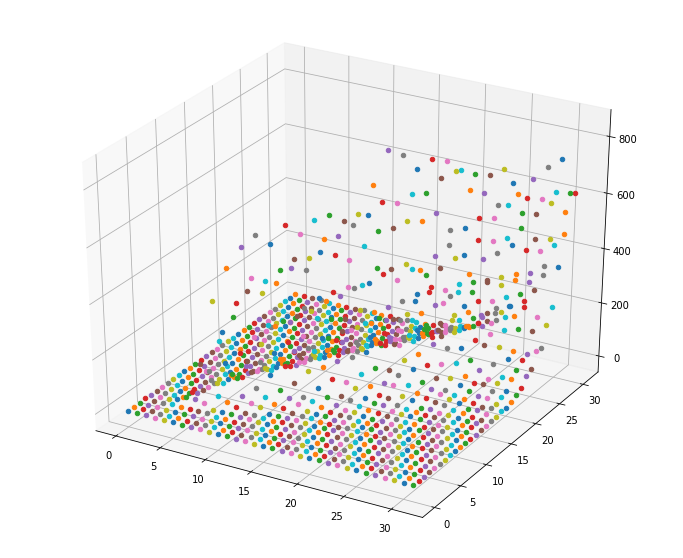

In [ ]:
fig = plt.figure(figsize=(12,10))

ax = plt.axes(projection= '3d')
for i in range(GL):
    for j in range(GL): 
        ax.scatter( i, j, dddd[i,j] )

plt.show()

In [ ]:
print( glcm_feat( dddd ))

(833.0, 39132942.0, 1094767.0)
